# Elegir el plan adecuado para los usuarios de Megaline

En este proyecto, desarrollaremos un modelo que elija el plan adecuado para los usuarios basándose en los datos de comportamiento de los clientes que ya se han permutado a los nuevos planes: Smart o Ultra. Queremos un modelo que tenga al menos un 75% de precisión. Dado que se trata de una proyecto de clasificación, probaremos los clasificadores **"Árbol de decisión"**, **"Bosque aleatorio"** y **"Regresión logística"**.

## Información General

Importar bibliotecas y módulos necesarios

In [3]:
import pandas as pd #para tratar dataframe
from sklearn.tree import DecisionTreeClassifier #para tratar los modelos de árbol de decisión
from sklearn.ensemble import RandomForestClassifier #para tratar los modelos Random Forest
from sklearn.linear_model import LogisticRegression #para tratar modelos de regresión logística
from sklearn.model_selection import train_test_split #para poder dividir conjuntos de datos
from sklearn.metrics import accuracy_score #para poder calcular la precisión del modelo
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Cargaremos el archivo para leer nuestro dataframe

In [4]:
user_behavior=pd.read_csv('C:/Users/USER/Documents/proyectos/proyecto 7 (terminado)/users_behavior.csv')

In [5]:
user_behavior.head()#first 5 rows

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [6]:
user_behavior["is_ultra"].unique()

array([0, 1], dtype=int64)

In [7]:
#esto introduce 0 en la columna "is_4wd" con el metodo .where() siempre que el valor NO sea igual a 1
user_behavior['is_ultra'] = user_behavior['is_ultra'].where(user_behavior['is_ultra'] == 1, 0)

#convierte los valores de la columna is_4wd en valores booleanos
user_behavior['is_ultra'] = user_behavior['is_ultra'].astype('bool')

#nos muestra los valores únicos de la columna is_4wd
user_behavior['is_ultra'].unique()

array([False,  True])

In [8]:
user_behavior.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,False
1,85.0,516.75,56.0,22696.96,False
2,77.0,467.66,86.0,21060.45,False
3,106.0,745.53,81.0,8437.39,True
4,66.0,418.74,1.0,14502.75,False


- `calls` - número de llamadas,
- `minutes`- duración total de la llamada en minutos,
- `messages` — número de mensajes de texto,
- `mb_used` — Tráfico de Internet utilizado en MB,
- `is_ultra` — plan para el mes actual (Ultra - 1, Smart - 0).

In [9]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 103.7 KB


- Nuestras características son las columnas de llamadas, minutos, mensajes y mb_used.
- Nuestros modelos las utilizarán para predecir nuestro objetivo: la columna is_ultra.

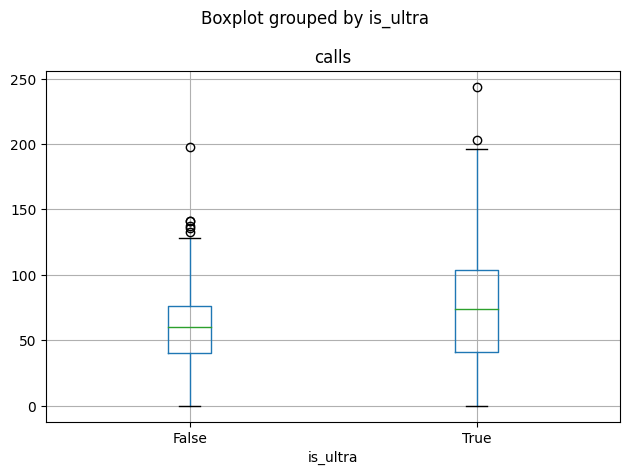

In [10]:
user_behavior.boxplot(column='calls', by='is_ultra')  
plt.tight_layout()

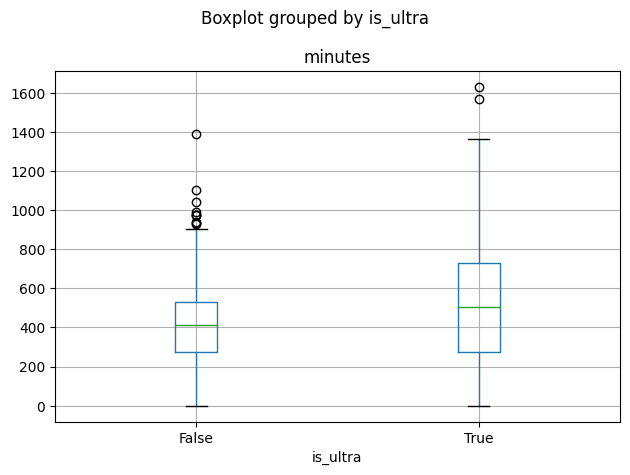

In [11]:
user_behavior.boxplot(column='minutes', by='is_ultra')  
plt.tight_layout()

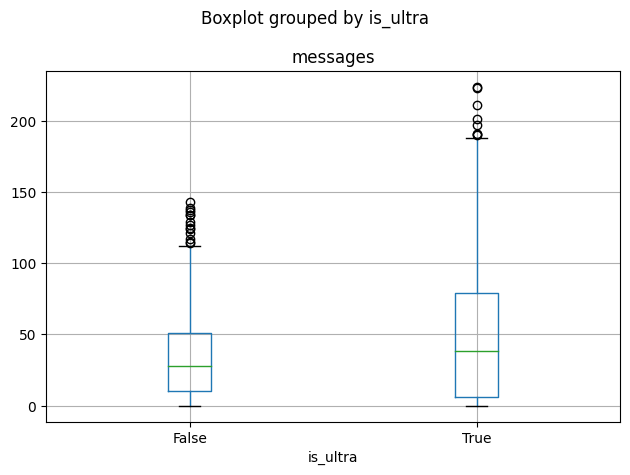

In [12]:
user_behavior.boxplot(column='messages', by='is_ultra')  
plt.tight_layout()

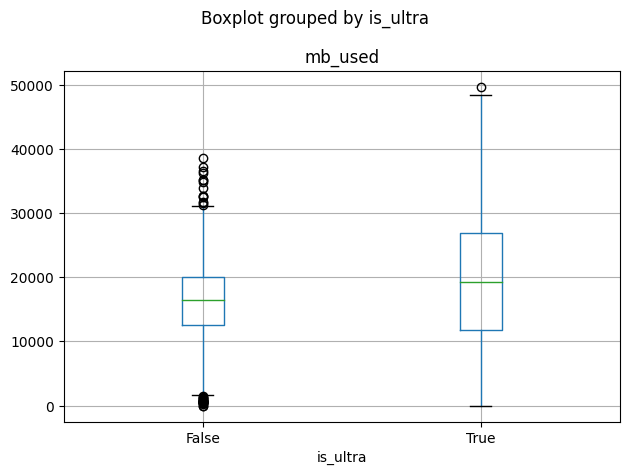

In [13]:
user_behavior.boxplot(column='mb_used', by='is_ultra')  
plt.tight_layout()

In [14]:
features_columns = user_behavior.drop('is_ultra', axis=1)
target_column = user_behavior['is_ultra']

array([[<AxesSubplot: title={'center': 'calls'}>,
        <AxesSubplot: title={'center': 'minutes'}>],
       [<AxesSubplot: title={'center': 'messages'}>,
        <AxesSubplot: title={'center': 'mb_used'}>]], dtype=object)

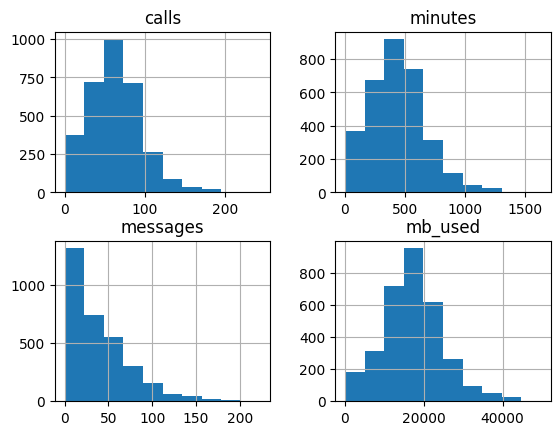

In [15]:
features_columns.hist()

In [16]:
px.scatter(x="is_ultra", y="calls", data_frame=user_behavior, color="is_ultra")

In [17]:
px.scatter(x="is_ultra", y="minutes", data_frame=user_behavior, color="is_ultra")

In [18]:
px.scatter(x="is_ultra", y="messages", data_frame=user_behavior, color="is_ultra")

In [19]:
px.scatter(x="is_ultra", y="mb_used", data_frame=user_behavior, color="is_ultra")

<__array_function__ internals>:200: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



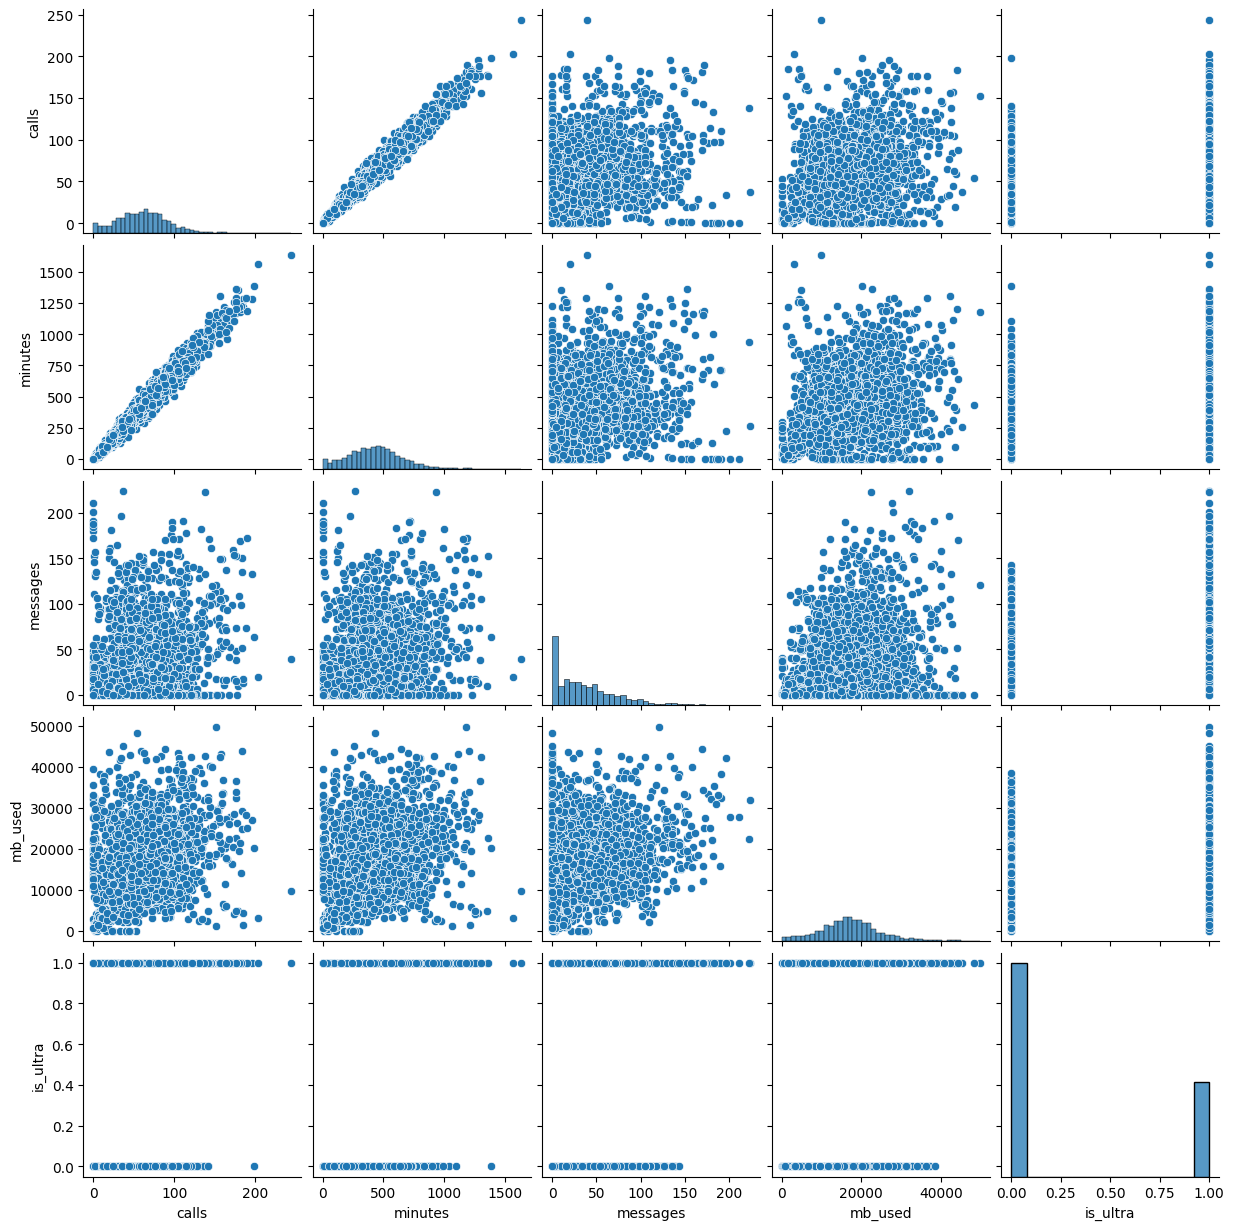

In [20]:
sns.pairplot(user_behavior)

## Segmentaremos en conjuntos de entrenamiento, validación y prueba

Para ello utilizamos la función train_test_split(). Esta función divide un conjunto de datos en 2. Como necesitamos 3 conjuntos, tenemos que hacerlo dos veces. Los porcentajes del conjunto de datos original deben ser 60, 20 y 20 para los conjuntos de entrenamiento, validación y prueba, respectivamente.

In [21]:
#divide user_behavior en user_behavior_train (60%) y df2 (40%)
user_behavior_train, df2 = train_test_split(user_behavior, test_size=0.4, random_state=12345)
#divide df2 en user_behavior_valid(50% de df2, es decir, 20% de user_behavior) y user_behavior_test(50% de df2, es decir, 20% de user_behavior)
user_behavior_valid, user_behavior_test = train_test_split(df2, test_size=0.5, random_state=12345)

Podemos ver la información general de cada conjunto dividido

In [22]:
user_behavior_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 3027 to 482
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
 4   is_ultra  1928 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 77.2 KB


In [23]:
user_behavior_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1386 to 3197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    bool   
dtypes: bool(1), float64(4)
memory usage: 25.7 KB


In [24]:
user_behavior_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 160 to 2313
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    bool   
dtypes: bool(1), float64(4)
memory usage: 25.7 KB


- Hemos segmentado con éxito nuestro dataframe original en un dataframe de entrenamiento (60%), un dataframe de validación (20%) y un dataframe de prueba (20%).
- Ahora tenemos que definir las características y las secciones objetivo de cada conjunto.
- Para las características, llamaremos a todo el dataframe, pero eliminaremos la columna de objetivo. El objetivo es la columna is_ultra

caracteristicas y objetivo de entrenamiento

In [25]:
features_train = user_behavior_train.drop('is_ultra', axis=1)
target_train = user_behavior_train['is_ultra']

caracteristicas y objetivo de validación

In [26]:
features_valid = user_behavior_valid.drop('is_ultra', axis=1)
target_valid = user_behavior_valid['is_ultra']

caracteristicas y objetivo de prueba

In [27]:
features_test = user_behavior_test.drop('is_ultra', axis=1)
target_test = user_behavior_test['is_ultra']

Hemos definido claramente las características(features) y los objetivos(target) de nuestros dataframe antes segmentados. Ahora podemos probar los modelos.

---

## Prueba de modelos

- Probaremos los diferentes modelos Árbol de Decisión, Bosque Aleatorio y el modelo de Regresión Logística y los entrenaremos con el dataframe de entrenamiento (usando el método fit()) y los probaremos en el dataframe de validación comparando una predicción usando características del dataframe de validación (usando el método predict()) con el objetivo real del dataframe de validación.
-  Para cada uno de ellos, ajustaremos los hiperparámetros de forma que podamos obtener una mayor puntuación de precisión, siendo esta última la métrica para elegir el mejor modelo con el que avanzar.

### Árbol de decisión
- vamos a llamar a la función DecisiontreeClassifier().
- Vamos a llamar a 2 hiperparámetros: "random_state" y "max_depth". random_state tiene que ser el mismo en todos los ámbitos por lo que le daremos un valor fijo (12345). max_depth, vamos a hacer un bucle a través de un montón de valores para max_depth (en este caso, de 1 a 10) y obtener sus puntuaciones de precisión.

In [28]:
for i in range(1, 11):    
    train_model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    train_model.fit(features_train, target_train)
    dt_valid_pred=train_model.predict(features_valid)
    print('Max depth', i, 'accuracy =', accuracy_score(target_valid, dt_valid_pred))

Max depth 1 accuracy = 0.7542768273716952
Max depth 2 accuracy = 0.7822706065318819
Max depth 3 accuracy = 0.7853810264385692
Max depth 4 accuracy = 0.7791601866251944
Max depth 5 accuracy = 0.7791601866251944
Max depth 6 accuracy = 0.7838258164852255
Max depth 7 accuracy = 0.7822706065318819
Max depth 8 accuracy = 0.7791601866251944
Max depth 9 accuracy = 0.7822706065318819
Max depth 10 accuracy = 0.7744945567651633


In [29]:
    
train_model = DecisionTreeClassifier(random_state=12345, max_depth=3)
train_model.fit(features_train, target_train)
dt_valid_pred=train_model.predict(features_valid)
print('Max depth', train_model, 'accuracy =', accuracy_score(target_valid, dt_valid_pred))

Max depth DecisionTreeClassifier(max_depth=3, random_state=12345) accuracy = 0.7853810264385692


Analizando los resultados, el mejor modelo de árbol de decisión es el que tiene max_depth 3, ya que tiene la puntuación de precisión más alta del 78,53%.

### Bosque aleatorio
- Utilizaremos la función RandomForestClassifier(). Nuestro hiperparámetro random_state seguira siendo el mismo. Los hiperparámetros con los que iteraremos son max_depth y n_estimators.
- En este caso crearemos primero una lista vacía.
-  Utilizaremos este bucle para crear modelos con diferentes iteraciones de los valores de max_depth y n_estimators que almacenaremos en la lista, de la que elegiremos el modelo con la puntuación de precisión más alta.

In [30]:
random_forest = [] #lista vacia
for i in range(1, 11):
    for e in range(10, 101, 10):
        random_forest_model = RandomForestClassifier(random_state=12345, max_depth=i, n_estimators=e)
        random_forest_model.fit(features_train, target_train)
        random_forest.append(random_forest_model)
    
print(max(random_forest, key=lambda random_forest_model: accuracy_score(random_forest_model.predict(features_valid), target_valid)))

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=12345)


Nuestro resultado nos dice que el mejor modelo clasificador de bosque aleatorio es el que tiene max_depth=8 y n_estimators=40. renombraremos random_foest por best_random_forest

In [31]:
best_random_forest=RandomForestClassifier(random_state=12345, max_depth=8, n_estimators=40)
best_random_forest.fit(features_train, target_train)
best_random_forest_pred= best_random_forest.predict(features_valid)
print(accuracy_score(target_valid, best_random_forest_pred))

0.8087091757387247


clasificador de bosque aleatorio tiene una precisión de alrededor del 81%. Siendo este el mejor.

### Regresión logística
- Utilizaremos la función LogisticRegression(). Manteniendo nuestro random_state el mismo.
- Todo lo que necesitamos es establecer un solucionador. Usaremos 'liblinear'

In [32]:
logistic_regression_model = LogisticRegression(random_state=12345, solver='liblinear')
logistic_regression_model.fit(features_train, target_train)
logistic_regression_valid_pred=logistic_regression_model.predict(features_valid)
print('Logistic Regression Accuracy =', accuracy_score(target_valid, logistic_regression_valid_pred))

Logistic Regression Accuracy = 0.7091757387247278


La precisión de nuestro modelo de regresión logística es del 71%.

Conclusión: ¿Quién ha sido el mejor modelo con mayor precisión?
-
- El mejor modelo que hemos obtenido es el modelo Random Forest con max_depth=8 y n_estimators=40 (puntuación de precisión alrededor del 81% .
- En segundo lugar, el modelo arbol de decisión con max_depth=3 (precisión del 78,5%). En último lugar, regresión logística (precisión del 71%).

--- 

## Comprobación de la calidad del modelo usando el conjunto de prueba
Ahora utilizaremos nuestro mejor modelo en el conjunto de prueba. Antes de eso, tenemos que volver a entrenar el modelo utilizando los conjuntos de entrenamiento y validación combinados.

Para combinar esos conjuntos, podemos utilizaremos la función **"pd.concat"**, que toma como argumento una lista de los conjuntos invocados y establece el parámetro axis=0 para que sea un apilamiento vertical.

In [33]:
train_final = pd.concat([user_behavior_train, user_behavior_valid], axis=0)
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571 entries, 3027 to 3197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     2571 non-null   float64
 1   minutes   2571 non-null   float64
 2   messages  2571 non-null   float64
 3   mb_used   2571 non-null   float64
 4   is_ultra  2571 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 102.9 KB


definiremos las características(features) y los objetivos(target)

In [34]:
features_final_train = train_final.drop('is_ultra', axis=1)
target_final_train = train_final['is_ultra']

- Ahora podemos entrenar (método fit()) utilizando las nuevas características y el objetivo, hacer predicciones (método predict()) utilizando las características del conjunto de prueba, y obtener una puntuación de precisión.
- utilizando nuestro mejor modelo 'best_random_forest'.

In [35]:
best_random_forest.fit(features_final_train, target_final_train)
best_random_forest_pred=best_random_forest.predict(features_test)
print(accuracy_score(best_random_forest_pred, target_test))

0.7993779160186625


Tenemos una puntuación de precisión de cerca del 80%, por encima del umbral del 75% para nuestro proyecto.
 
---

## Prueba de cordura
- Para comprobar que nuestro modelo es idóneo, tendremos que compararlo con un modelo(al azar).
- Veamos en primer lugar cuántos clientes smart y ultra tenemos en el conjunto de pruebas

In [36]:
smart_target=(target_test == 0)
ultra_target=(target_test == 1)

print('Number of smart clients:', smart_target.sum())
print('Number of ultra clients:', ultra_target.sum())

Number of smart clients: 440
Number of ultra clients: 203


Tenemos muchos más clientes en el plan smart casi lo doble que en el plan ultra, así que los utilizaremos como ejemplo. Supongamos que tenemos un clasificador pseudoaleatorio cuyas predicciones fueron sólo 0 (es decir, plan smart) durante todo el conjunto de pruebas. ¿Cuál será nuestra puntuación de precisión?

In [37]:
smart_chance = smart_target.sum()/len(target_test)
print('Accuracy of random smart classifier:', smart_chance)

Accuracy of random smart classifier: 0.6842923794712286


El clasificador pseudoaleatorio tendría una puntuación de precisión del 68,4%, que es inferior al 80% que obtuvo nuestro modelo clasificador de bosque aleatorio. Así que nuestro modelo pasa la prueba de cordura

## Conclusión
- Segmentamos nuestros datos en conjuntos de entrenamiento(user_behaviors_train), validación(user_behaviors_valid) y prueba(user_behaviors_test). 
- Probamos cada modelo arbol de decisión, bosque aleatorio y regresion logistica quedándonos con el mas preciso de los tres que es **"RandomForestClassifier"** el mejor, con una precisión del **"80% en el conjunto de validación"** y del **"79% en el conjunto de prueba"**.
- Comprobamos la calidad del modelo usando el conjunto de prueba.
- pasando nuestra prueba de cordura el plan **"smart"**.